In [1]:
from tf_keras import Model
import tf_keras as keras
from tf_keras.layers import Dense, Flatten,Dropout
from tf_keras.optimizers import Adam
from datasets import load_dataset
import numpy as np
import tensorflow as tf
import os

In [2]:
input_shape = (224, 224, 3)
img_height = img_width = 224
batch_size = 32

In [3]:
vgg16 = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

In [4]:
for layer in vgg16.layers:
    layer.trainable = False

In [5]:
x = Flatten()(vgg16.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

In [6]:
model_vgg = Model(inputs=vgg16.input, outputs=x)

In [7]:
model_vgg.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])

In [8]:
model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
root = "../spectrograms"
test_ds = keras.utils.image_dataset_from_directory(str(root), 
                                               validation_split = 0.2,
                                               subset = 'validation',
                                               seed = 42,
                                               image_size = (img_height, img_width),
                                               batch_size = batch_size)

Found 100 files belonging to 2 classes.
Using 20 files for validation.


In [10]:
train_ds = keras.utils.image_dataset_from_directory(str(root), 
                                               validation_split = 0.2,
                                               subset = 'training',
                                               seed = 42,
                                               image_size = (img_height, img_width),
                                               batch_size = batch_size)

Found 100 files belonging to 2 classes.
Using 80 files for training.


In [11]:
history_vgg16 = model_vgg.fit(train_ds, epochs=10, 
                    validation_data=test_ds)

Epoch 1/10
3/3 [==============================] - 11s 4s/step - loss: 10.6840 - accuracy: 0.4250 - val_loss: 5.6107 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 11s 4s/step - loss: 7.2749 - accuracy: 0.3500 - val_loss: 3.8846 - val_accuracy: 0.3500
Epoch 3/10
3/3 [==============================] - 14s 5s/step - loss: 5.5024 - accuracy: 0.4625 - val_loss: 4.0984 - val_accuracy: 0.3500
Epoch 4/10
3/3 [==============================] - 12s 4s/step - loss: 3.8058 - accuracy: 0.6125 - val_loss: 4.2065 - val_accuracy: 0.4500
Epoch 5/10
3/3 [==============================] - 13s 4s/step - loss: 4.8616 - accuracy: 0.5375 - val_loss: 2.9740 - val_accuracy: 0.5500
Epoch 6/10
3/3 [==============================] - 13s 4s/step - loss: 2.1564 - accuracy: 0.7625 - val_loss: 1.7663 - val_accuracy: 0.5500
Epoch 7/10
3/3 [==============================] - 13s 4s/step - loss: 2.0574 - accuracy: 0.7750 - val_loss: 1.2963 - val_accuracy: 0.6000
Epoch 8/10
3/3 [=================

In [12]:
loss, accuracy = model_vgg.evaluate(test_ds)
print('Validation accuracy:', accuracy)

1/1 [==============================] - 2s 2s/step - loss: 1.2190 - accuracy: 0.8000
Validation accuracy: 0.800000011920929


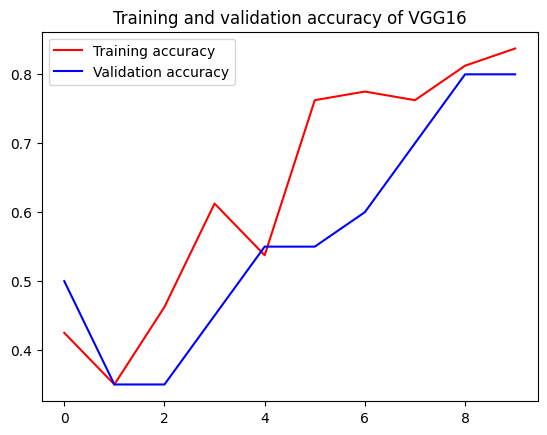

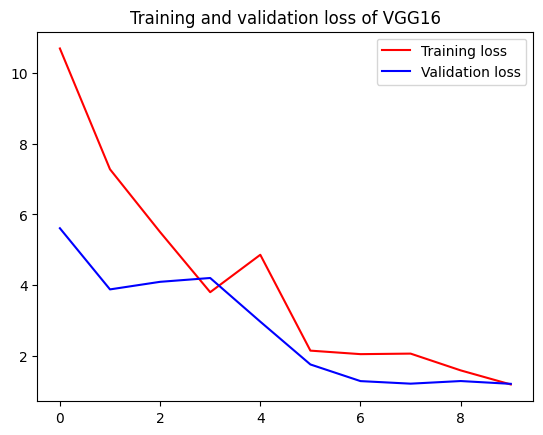

In [13]:
import matplotlib.pyplot as plt
acc = history_vgg16.history['accuracy']
val_acc = history_vgg16.history['val_accuracy']
loss = history_vgg16.history['loss']
val_loss = history_vgg16.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy of VGG16')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss of VGG16')
plt.legend()

plt.show()

In [ ]:
for image_batch, label_batch in test_ds.take(1):
    break 

predicted_batch = model_vgg.predict(image_batch)
class_names = np.array(test_ds.class_names)

1/1 [==============================] - 3s 3s/step


In [15]:
predicted_batch = model_vgg.predict(image_batch)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
print('VGG:',predicted_label_batch)

1/1 [==============================] - 2s 2s/step
VGG: ['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE'
 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE']


In [ ]:
script_dir = os.getcwd() 
model_vgg.save(os.path.join(script_dir, '..', '..', 'models', 'my_vgg16.h5'))

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# ResNet

In [3]:
input_shape = (224, 224, 3)
img_height = img_width = 224
batch_size = 32

In [4]:
resnet = keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [6]:
x = Flatten()(resnet.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

In [7]:
model_resnet = Model(inputs=resnet.input, outputs=x)

In [8]:
model_resnet.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])

In [9]:
model_resnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [10]:
root = "../spectrograms"
test_ds = keras.utils.image_dataset_from_directory(str(root), 
                                               validation_split = 0.2,
                                               subset = 'validation',
                                               seed = 42,
                                               image_size = (img_height, img_width),
                                               batch_size = batch_size)

Found 100 files belonging to 2 classes.
Using 20 files for validation.


In [11]:
train_ds = keras.utils.image_dataset_from_directory(str(root), 
                                               validation_split = 0.2,
                                               subset = 'training',
                                               seed = 42,
                                               image_size = (img_height, img_width),
                                               batch_size = batch_size)

Found 100 files belonging to 2 classes.


Using 80 files for training.


In [12]:
history_resnet = model_resnet.fit(train_ds, epochs=10, 
                    validation_data=test_ds)

Epoch 1/10
3/3 [==============================] - 6s 1s/step - loss: 1.3156 - accuracy: 0.6000 - val_loss: 0.4181 - val_accuracy: 0.8500
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 0.5995 - accuracy: 0.7250 - val_loss: 0.2835 - val_accuracy: 0.8500
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 0.2730 - accuracy: 0.9000 - val_loss: 0.2765 - val_accuracy: 0.9500
Epoch 4/10
3/3 [==============================] - 5s 2s/step - loss: 0.3145 - accuracy: 0.9125 - val_loss: 0.2840 - val_accuracy: 0.9500
Epoch 5/10
3/3 [==============================] - 5s 1s/step - loss: 0.2123 - accuracy: 0.9250 - val_loss: 0.2574 - val_accuracy: 0.9500
Epoch 6/10
3/3 [==============================] - 6s 2s/step - loss: 0.0839 - accuracy: 0.9750 - val_loss: 0.2413 - val_accuracy: 0.9500
Epoch 7/10
3/3 [==============================] - 4s 1s/step - loss: 0.0620 - accuracy: 0.9750 - val_loss: 0.2474 - val_accuracy: 0.9000
Epoch 8/10
3/3 [=========================

In [13]:
loss, accuracy = model_resnet.evaluate(test_ds)
print('Validation accuracy:', accuracy)

1/1 [==============================] - 1s 799ms/step - loss: 0.3067 - accuracy: 0.9000
Validation accuracy: 0.8999999761581421


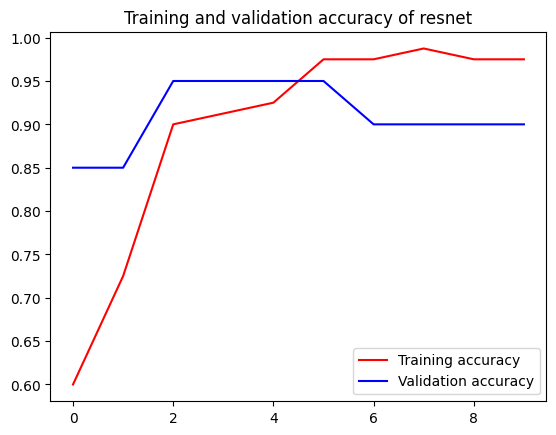

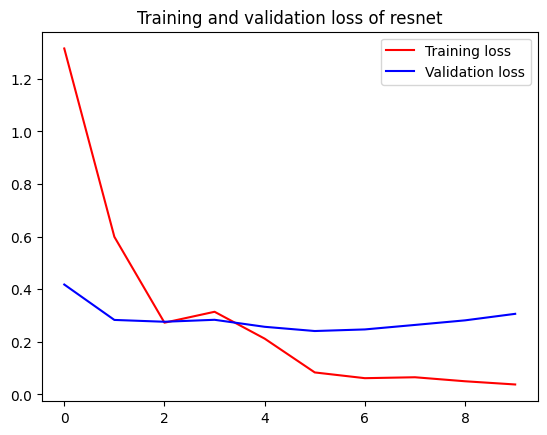

In [14]:
import matplotlib.pyplot as plt
acc = history_resnet.history['accuracy']
val_acc = history_resnet.history['val_accuracy']
loss = history_resnet.history['loss']
val_loss = history_resnet.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy of resnet')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss of resnet')
plt.legend()

plt.show()

In [15]:
for image_batch, label_batch in test_ds.take(1):
    break 

predicted_batch = model_resnet.predict(image_batch)
class_names = np.array(test_ds.class_names)

1/1 [==============================] - 1s 1s/step


In [16]:
predicted_batch = model_resnet.predict(image_batch)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
print('ResNet:',predicted_label_batch)

1/1 [==============================] - 1s 750ms/step
ResNet: ['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE'
 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE']


In [19]:
script_dir = os.getcwd()
model_resnet.save(os.path.join(script_dir, '..', '..', 'models', 'my_resnet.h5'))

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# MobileNet

In [20]:
from tf_keras import Model
import tf_keras as keras
from tf_keras.layers import Dense, Flatten,Dropout
from tf_keras.optimizers import Adam
from datasets import load_dataset
import numpy as np
import tensorflow as tf

In [21]:
input_shape = (224, 224, 3)
img_height = img_width = 224
batch_size = 32

In [22]:
mobilenet = keras.applications.mobilenet.MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)

In [23]:
for layer in mobilenet.layers:
    layer.trainable = False

In [24]:
x = Flatten()(mobilenet.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

In [25]:
model_mobilenet = Model(inputs=mobilenet.input, outputs=x)

In [26]:
model_mobilenet.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])

In [27]:
model_mobilenet.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

In [28]:
root = "../spectrograms"
test_ds = keras.utils.image_dataset_from_directory(str(root), 
                                               validation_split = 0.2,
                                               subset = 'validation',
                                               seed = 42,
                                               image_size = (img_height, img_width),
                                               batch_size = batch_size)

Found 100 files belonging to 2 classes.
Using 20 files for validation.


In [29]:
train_ds = keras.utils.image_dataset_from_directory(str(root), 
                                               validation_split = 0.2,
                                               subset = 'training',
                                               seed = 42,
                                               image_size = (img_height, img_width),
                                               batch_size = batch_size)

Found 100 files belonging to 2 classes.


Using 80 files for training.


In [30]:
history_mobilenet = model_mobilenet.fit(train_ds, epochs=10, 
                    validation_data=test_ds)

Epoch 1/10
3/3 [==============================] - 2s 394ms/step - loss: 0.9039 - accuracy: 0.5125 - val_loss: 0.3866 - val_accuracy: 0.9000
Epoch 2/10
3/3 [==============================] - 1s 304ms/step - loss: 0.3799 - accuracy: 0.8125 - val_loss: 0.2379 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 1s 304ms/step - loss: 0.2401 - accuracy: 0.9000 - val_loss: 0.1959 - val_accuracy: 0.9000
Epoch 4/10
3/3 [==============================] - 1s 297ms/step - loss: 0.1477 - accuracy: 0.9375 - val_loss: 0.2252 - val_accuracy: 0.9000
Epoch 5/10
3/3 [==============================] - 1s 307ms/step - loss: 0.1051 - accuracy: 0.9750 - val_loss: 0.1895 - val_accuracy: 0.9000
Epoch 6/10
3/3 [==============================] - 1s 291ms/step - loss: 0.1109 - accuracy: 0.9875 - val_loss: 0.1211 - val_accuracy: 0.9500
Epoch 7/10
3/3 [==============================] - 1s 269ms/step - loss: 0.0688 - accuracy: 0.9750 - val_loss: 0.0851 - val_accuracy: 0.9500
Epoch 8/10
3/3 [====

In [31]:
loss, accuracy = model_mobilenet.evaluate(test_ds)
print('Validation accuracy:', accuracy)

1/1 [==============================] - 0s 259ms/step - loss: 0.0560 - accuracy: 1.0000
Validation accuracy: 1.0


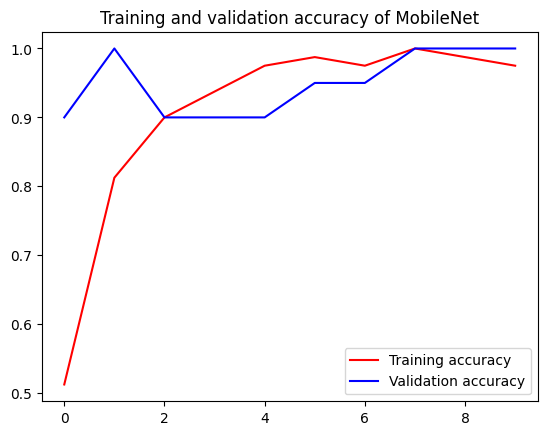

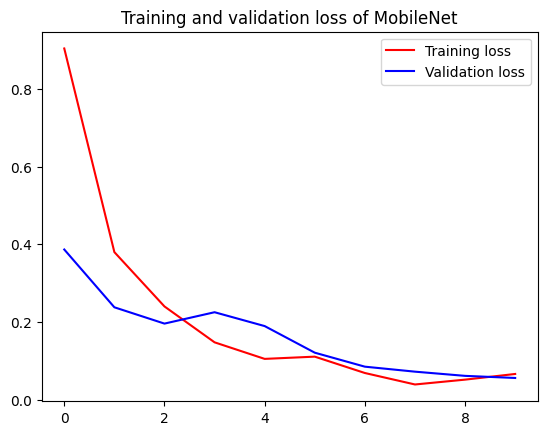

In [32]:
import matplotlib.pyplot as plt
acc = history_mobilenet.history['accuracy']
val_acc = history_mobilenet.history['val_accuracy']
loss = history_mobilenet.history['loss']
val_loss = history_mobilenet.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy of MobileNet')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss of MobileNet')
plt.legend()

plt.show()

In [ ]:
for image_batch, label_batch in test_ds.take(1):
    break 

predicted_batch = model_mobilenet.predict(image_batch)
class_names = np.array(test_ds.class_names)

1/1 [==============================] - 1s 543ms/step


In [34]:
predicted_batch = model_mobilenet.predict(image_batch)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
print('MobileNet:',predicted_label_batch)

1/1 [==============================] - 0s 178ms/step
MobileNet: ['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE'
 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE']


In [35]:
model_mobilenet.save(os.path.join(script_dir, '..', '..', 'models', 'my_mobilenet.h5'))